<center><h1>BUSS6002 - Data Science in Business</h1></center>

# Tutorial 4 Tasks



## Task 1 - Aggregation

Use ``DirectMarketing.csv``

#### How much do different age groups spend on average?

1. Create a pivot table for the three age groups with mean values.
2. Visualise the result with a bar chart.

## Task 2 - APIs

We will use Quandl to analyse Forex exchange data.

1. Use Quandl to obtain time-series datasets for the GBP/USD and AUD/USD exchange rates. These are available through the ``CURRFX`` database and have the Quandl codes ``GBPUSD`` and ``AUDUSD`` respectively. We're interested in rates between the 1st of January 2018 and the 30th of December 2018. Use the ``collapse='weekly'`` argument to request weekly data.

2. Merge the GBP and AUD dataframes using an inner merge. Use indices as merge keys for both left and right DataFrames. To keep track of columns, it may be necessary to rename them.

3. So far, all columns are exchange rates in terms of USD. Create a new column, corresponding to the exchange rate of GBP in AUD. You can call the column ``GBP in AUD``.

4. Plot the new column as a line plot.

## Task 3 - Extension (Optional)

#### Is advertising effective?

The advertising team wants to know whether customers that are exposed to ads spend more or less than customers who find the site organically.

The advertising team has surveyed the customers from the original dataset and asked whether they:
1. Clicked through on an ad
2. Saw a physical ad
3. Had no ad interactions

They have provided the data to you in the ``AdExposure.csv`` file. The groups are numbered 0,1,2 respectively from the aforementioned list of options. They also updated the ``DirectMarketing.csv`` file to include customer ids and gave you the file Use ``DirectMarketingWIDs.csv``.

Use the customer_id to merge the DirectMarketing and AdExposure data. Then use aggregation to find the average customer spend in these three groups.

*Please note that the data is randomly generated and does not reflect the real world impact of advertising campaigns*

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

marketing = pd.read_csv('DirectMarketing.csv')


In [6]:
marketing

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671


In [30]:
# Task 1 How much do different age groups spend on average?
# 1.1 Create a pivot table for the three age groups with mean values.
# 1.2 Visualise the result with a bar char

age_group = marketing.groupby('Age').mean()
age_group['AmountSpent']

# plt.bar(age_group,0.4)

Age
Middle    1501.690945
Old       1432.126829
Young      558.623693
Name: AmountSpent, dtype: float64

In [25]:
age_group

,Salary,Children,Catalogs,AmountSpent
Age,,,,
Middle,72036.417323,1.187008,15.425197,1501.690945
Old,56365.853659,0.136585,15.160976,1432.126829
Young,27715.679443,1.055749,13.024390,558.623693


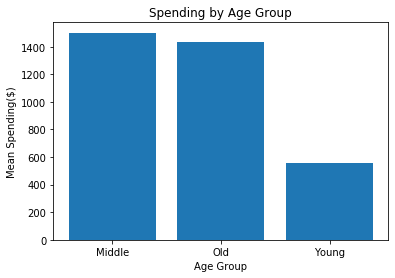

In [33]:
# 1.2 Visualise the result with a bar char
y_value = age_group['AmountSpent'].values
x_value = age_group.index


plt.bar(x_value,y_value)
plt.title('Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Spending($)')

plt.show()